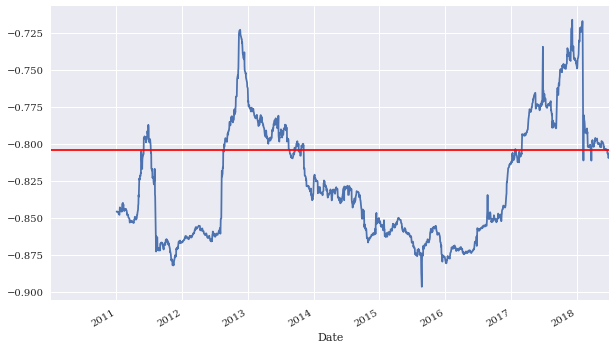

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pylab
from pylab import plt, mpl  
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
raw = pd.read_csv('../Data/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)
eod_data = raw[['.SPX', '.VIX']].dropna()
#eod_data.plot(subplots=True, figsize=(10,6));
#eod_data.loc[:'2012-12-31'].plot(figsize=(10,6), secondary_y='.VIX')
rets = np.log(eod_data/eod_data.shift(1))
rets.dropna(inplace=True)
#rets.plot(subplots=True, figsize=(10,6))
#pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins':35}, figsize=(10,6))
regs = np.polyfit(rets['.SPX'], rets['.VIX'], 1)
#ax = rets.plot(kind='scatter', x='.SPX', y='.VIX')
#ax.plot(rets['.SPX'], np.polyval(regs, rets['.SPX']), 'r', lw=2)
rets.corr()
ax = rets['.SPX'].rolling(252).corr(rets['.VIX']).plot(figsize=(10,6))
ax.axhline(rets.corr().iloc[0,1], c='r')